# 美国2012年总统候选人政治献金数据分析

导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

方便大家操作，将月份和参选人以及所在政党进行定义

In [2]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [4]:
ele = pd.read_csv('./usa_election.csv',low_memory=False)
ele.shape

(536041, 16)

查看文件样式以及基本信息

In [5]:
ele.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [6]:
ele['party'] = ele['cand_nm'].map(parties)
ele.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [7]:
ele['memo_text'].unique()

array([nan, 'REATTRIBUTION / REDESIGNATION REQUESTED',
       'REATTRIBUTION FROM SPOUSE', 'SEE REATTRIBUTION',
       'REATTRIBUTION TO SPOUSE', 'REATTRIBUTION REQUESTED',
       'REFUNDED $6.00 ON 11/16/2011', 'REFUND TO BE ISSUED',
       'REFUNDED $165.43 ON 12/06/2011', 'REFUNDED $140.00 ON 01/23/2012',
       'REFUNDED $93.00 ON 12/12/2011', 'REFUNDED $5.00 ON 12/19/2011',
       'CHARGED BACK', 'REFUNDED $2500.00 ON 09/06/2011',
       'CHARGED BACK $45.00 ON 07/26/2011',
       'ATTRIBUTION TO PARTNERS REQUESTED',
       'REFUNDED $25.00 ON 07/15/2011',
       'CHARGED BACK $2500.00 ON 06/22/2011', 'CHECK RETURNED BY BANK',
       'REFUNDED $20.00 ON 01/09/2012',
       'CHARGED BACK $2000.00 ON 01/25/2012',
       'REFUNDED $500.00 ON 11/01/2011',
       'REFUNDED $2500.00 ON 12/19/2011', 'REFUNDED $60.00 ON 12/01/2011',
       'REFUNDED $100.00 ON 11/16/2011',
       'REFUNDED $5000.00 ON 12/21/2011', 'PARTNERSHIP ATTRIBUTION',
       'IN-KIND: FACILITY RENTAL/CATERING SERVIC

In [8]:
ele.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [10]:
drop_labels = ['cmte_id', 'cand_id','receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num',]
ele.drop(labels = drop_labels, axis = 1, inplace=True)

In [11]:
ele.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,Republican


查看单独一行，是否加上了'party'一列

使用np.unique()函数查看colums：party这一列中有哪些元素

使用value_counts()函数，统计party列中各个元素出现次数

In [12]:
ele['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [13]:
# 
ele.groupby(['party'])['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [14]:
ele.groupby(['party','contb_receipt_dt'])['contb_receipt_amt'].sum()

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
            02-DEC-11            216056.96
            02-JAN-12             89743.60
            02-JUL-11             17105.00
            02-JUN-11            422453.00
            02-MAY-11            396675.00
            02-NOV-11            147183.81
            02-OCT-11             62605.62
            02-SEP-11            137948.41
            03-AUG-11            147053.02
            03-DEC-11             81304.02
            03-JAN-12             87406.97
            03-JUL-11              5982.00
            03-JUN-11    

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [15]:
months

{'JAN': 1,
 'FEB': 2,
 'MAR': 3,
 'APR': 4,
 'MAY': 5,
 'JUN': 6,
 'JUL': 7,
 'AUG': 8,
 'SEP': 9,
 'OCT': 10,
 'NOV': 11,
 'DEC': 12}

In [16]:
def convert(item):
#     31-OCT-11
    day,mon,year = item.split('-')
    
    m = months[mon]
    
#     2011-8-11  ————>datetime
    return '20'+year + '-'+ str(m) + '-' + day

In [22]:
# 只执行一次，再次执行报错，因为已经转换成功了
ele['contb_receipt_dt'] = ele['contb_receipt_dt'].map(convert)

查看是否转换成功

In [20]:
ele.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,contb_receipt_de
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-6-20,Republican,2011-6-20
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-6-23,Republican,2011-6-23
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-7-05,Republican,2011-7-05
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,2011-8-01,Republican,2011-8-01
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,2011-6-20,Republican,2011-6-20


将时间转换为时间数据类型  
根据时间进行排序

In [23]:
ele['contb_receipt_dt'] = pd.to_datetime(ele['contb_receipt_dt'])
ele.dtypes

cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
party                        object
contb_receipt_de             object
dtype: object

得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [28]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
a.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [26]:
ele2 = ele.groupby(['party','contb_receipt_dt'])[['contb_receipt_amt']].sum()
ele2
# 随着时间的推移，收到的政治现金的总数，累加和 cumsum

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   2011-04-04                640235.12
           2011-04-05                307641.00
           2011-04-06                247542.59
           2011-04-07                252336.00
           2011-04-08                295452.00
           2011-04-09                105879.00
           2011-04-10                100373.00
           2011-04-11                360728.00
           2011-04-12                405160.46
           2011-04-13                382836.33
           2011-04-14                306643.50
           2011-04-15                408377.00
           2011-04-16                 82658.00
           2011-04-17                 70802.00
           2011-04-18                501971.37
           2011-04-19                304874.00
           2011-04-20                314540.11
           2011-04-21                315618.00
           2011-04-22                295464.45
           2011-04-23                 34829.00
           2011-04-24                 37100.00
           2011-04-25                447282.00
           2011-04-26                600960.50
           2011-04-27                188595.00
           2011-04-28                677041.36
           2011-04-29                294709.00
           2011-04-30                 95582.00
           2011-05-01                 82644.00
           2011-05-02                396675.00
           2011-05-03                261819.11
...                                        ...
Republican 2012-01-02                114037.13
           2012-01-03                155803.62
           2012-01-04                577733.61
           2012-01-05                451065.98
           2012-01-06                262798.46
           2012-01-07                148145.58
           2012-01-08                 84342.84
           2012-01-09                501931.44
           2012-01-10                487901.67
           2012-01-11                452916.99
           2012-01-12                348327.39
           2012-01-13                463368.26
           2012-01-14                608470.68
           2012-01-15                322194.08
           2012-01-16                367791.70
           2012-01-17                625365.77
           2012-01-18                888681.17
           2012-01-19               1066250.23
           2012-01-20                401298.03
           2012-01-21                374261.81
           2012-01-22                507168.71
           2012-01-23                645477.15
           2012-01-24                462233.66
           2012-01-25                416931.39
           2012-01-26                256406.86
           2012-01-27                368441.82
           2012-01-28                 82775.80
           2012-01-29                 75220.02
           2012-01-30                255204.80
           2012-01-31                869890.41

[1183 rows x 1 columns]

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [38]:
ele3

contb_receipt_amt                                  
party                     Democrat Libertarian    Reform  Republican
contb_receipt_dt                                                    
2011-01-01                    0.00         0.0      0.00     8600.00
2011-01-03                    0.00         0.0      0.00     4800.00
2011-01-04                    0.00         0.0      0.00     5000.00
2011-01-12                    0.00         0.0      0.00     4150.00
2011-01-13                    0.00         0.0      0.00     4000.00
2011-01-14                    0.00         0.0      0.00     6000.00
2011-01-15                    0.00         0.0      0.00      500.00
2011-01-16                    0.00         0.0      0.00      750.00
2011-01-17                    0.00         0.0      0.00      500.00
2011-01-18                    0.00         0.0      0.00     4800.00
2011-01-20                    0.00         0.0      0.00     2650.00
2011-01-21                    0.00         0.0      0.00      250.00
2011-01-22                    0.00         0.0      0.00      250.00
2011-01-24                    0.00         0.0      0.00     2400.00
2011-01-26                    0.00         0.0      0.00     5400.00
2011-01-27                    0.00         0.0      0.00     2650.00
2011-01-28                    0.00         0.0      0.00      650.00
2011-01-29                    0.00         0.0      0.00      750.00
2011-01-31                    0.00         0.0      0.00     6000.00
2011-02-01                    0.00         0.0      0.00      250.00
2011-02-03                    0.00         0.0      0.00     3250.00
2011-02-04                    0.00         0.0      0.00     1000.00
2011-02-07                    0.00         0.0      0.00     9300.00
2011-02-08                    0.00         0.0      0.00     3000.00
2011-02-09                    0.00         0.0      0.00     6550.00
2011-02-10                    0.00         0.0      0.00      250.00
2011-02-11                    0.00         0.0      0.00      250.00
2011-02-12                    0.00         0.0      0.00      250.00
2011-02-13                    0.00         0.0      0.00      250.00
2011-02-14                    0.00         0.0      0.00     2500.00
...                            ...         ...       ...         ...
2012-01-02                89743.60         0.0   2437.13   114037.13
2012-01-03                87406.97         0.0   4006.32   155803.62
2012-01-04               166547.24         0.0   3445.80   577733.61
2012-01-05               198224.86         0.0   3925.48   451065.98
2012-01-06               138822.95         0.0  12676.24   262798.46
2012-01-07                91161.12         0.0   4201.12   148145.58
2012-01-08                81758.00         0.0   3457.52    84342.84
2012-01-09               206996.99         0.0   1950.00   501931.44
2012-01-10               191988.12         0.0   2195.00   487901.67
2012-01-11               185823.52         0.0    945.00   452916.99
2012-01-12               467212.53         0.0    625.00   348327.39
2012-01-13               374570.48         0.0    351.00   463368.26
2012-01-14                81687.80         0.0    200.00   608470.68
2012-01-15                72983.50         0.0    400.00   322194.08
2012-01-16               117163.21         0.0    400.00   367791.70
2012-01-17               298246.61         0.0     40.00   625365.77
2012-01-18               219002.47         0.0      0.00   888681.17
2012-01-19               275532.88         0.0     65.00  1066250.23
2012-01-20               245166.57         0.0    386.00   401298.03
2012-01-21                18513.50         0.0    280.00   374261.81
2012-01-22                67194.23         0.0    450.00   507168.71
2012-01-23               337307.07         0.0    225.00   645477.15
2012-01-24               458909.23         0.0    500.00   462233.66
2012-01-25               438949.32         0.0    282.00   416931.39
2012-01-26     

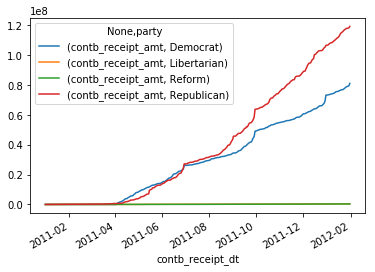

In [39]:
ele3 = ele2.unstack('party',fill_value=0)
ele3.cumsum().plot()

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

把时间作为列，党派作为行来观察,unstack('contb_receipt')

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [40]:
ele4 = ele.groupby(['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum()
ele4

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [41]:
ele4[:,'DISABLED VETERAN']

cand_nm
Cain, Herman       300.00
Obama, Barack     4205.00
Paul, Ron         2425.49
Santorum, Rick     250.00
Name: contb_receipt_amt, dtype: float64

In [43]:
ele4[:,'LAWYER']

cand_nm
Bachmann, Michelle         8318.00
Cain, Herman               3850.00
Gingrich, Newt            47005.00
Huntsman, Jon             49263.00
McCotter, Thaddeus G        500.00
Obama, Barack           1974727.92
Paul, Ron                 56209.87
Pawlenty, Timothy         58025.00
Perry, Rick               86505.00
Romney, Mitt               7225.00
Santorum, Rick            14207.00
Name: contb_receipt_amt, dtype: float64

In [45]:
ele4[:,'ATTORNEY']

cand_nm
Bachmann, Michelle                  46214.00
Cain, Herman                        76472.87
Gingrich, Newt                     205577.00
Huntsman, Jon                      143532.50
Johnson, Gary Earl                   9425.00
McCotter, Thaddeus G                  500.00
Obama, Barack                     7112343.35
Paul, Ron                          195712.11
Pawlenty, Timothy                  238331.10
Perry, Rick                        768778.80
Roemer, Charles E. 'Buddy' III      14186.00
Romney, Mitt                      3662610.21
Santorum, Rick                     107130.00
Name: contb_receipt_amt, dtype: float64

In [46]:
ele4[:,'DOCTOR']

cand_nm
Bachmann, Michelle      9550.00
Cain, Herman            2650.00
Gingrich, Newt         12745.00
Huntsman, Jon           2500.00
Johnson, Gary Earl      2500.00
Obama, Barack         108242.00
Paul, Ron              20494.55
Pawlenty, Timothy       1100.00
Perry, Rick            71376.00
Santorum, Rick          5600.00
Name: contb_receipt_amt, dtype: float64

In [47]:
ele4

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

把索引变成列,Series.reset_index()

In [48]:
ele4.reset_index()

,cand_nm,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle",100% DISABLED VETERAN,1869.50
1,"Bachmann, Michelle",100% DISABLED VIETNAM VETERAN,236.25
2,"Bachmann, Michelle",A/C AND HEAT,250.00
3,"Bachmann, Michelle",ACADEMIC EMPLOYMENT SPECIALIST,25.00
4,"Bachmann, Michelle",ACCOUNT,50.00
5,"Bachmann, Michelle",ACCOUNT ANALYST,200.00
6,"Bachmann, Michelle",ACCOUNT EXECUTIVE,100.00
7,"Bachmann, Michelle",ACCOUNT MANAGER,230.00
8,"Bachmann, Michelle",ACCOUNTANT,12979.00
9,"Bachmann, Michelle",ACCOUNTANT TRAINER,250.00


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [49]:
ele.groupby(['cand_nm'])['contb_receipt_amt'].apply(max)

cand_nm
Bachmann, Michelle                   3022.00
Cain, Herman                        10000.00
Gingrich, Newt                       5100.00
Huntsman, Jon                        5000.00
Johnson, Gary Earl                   2500.00
McCotter, Thaddeus G                 4000.00
Obama, Barack                     1944042.43
Paul, Ron                            5000.00
Pawlenty, Timothy                   10000.00
Perry, Rick                         10000.00
Roemer, Charles E. 'Buddy' III        200.00
Romney, Mitt                        12700.00
Santorum, Rick                       5000.00
Name: contb_receipt_amt, dtype: float64

In [50]:
ele.query("cand_nm == 'Obama, Barack' and contb_receipt_amt == 1944042.43")

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,contb_receipt_de
176127,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,Democrat,2011-12-31
